Hello!
I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by
yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead
will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red
comments. </div>
You can answer me by using this: not sue what i can do about putting all the imports in the first cell
<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a>
</div>



**Keep in mind that the project will be accepted only when all the “red” issues are resolved.**

<div class="alert alert-block alert-success"> <b>General Feedback</b> <a
class="tocSkip"></a>


Hi, Joshua 
    
I am happy to review your project today



<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
Please complete the project before submiting
    
</div>
    
Waiting for a new version

<div class="alert alert-block alert-success"> <b>General Feedback v2</b> <a
class="tocSkip"></a>


Hi, Joshua 
    
Thank you for submiting finished project
    
Brilliant work!!
    
    
There are many things that I like:
    
- good visualizations
- right code for hypotheses testing
- nice primary data preprocessing 
- super conclusion
- very deep analysis of plans 


<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
There is just one issue - please fill in missing values in dataset for revenue calculation
    
</div>
    
One more time and you will have it

<div class="alert alert-block alert-success"> <b>General Feedback v3</b> <a
class="tocSkip"></a>


Hi, Joshua 
    
Well done
    
I am happy to say that your project has been accepted
    
Keep up good work and good luck in the next sprint

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 
from scipy.stats import ttest_ind



## Load data

In [2]:
# Load the data files into different DataFrames
megaline_calls= pd.read_csv('/datasets/megaline_calls.csv')

In [3]:
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')

In [4]:
megaline_messages= pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
megaline_plans= pd.read_csv('/datasets/megaline_plans.csv')

In [6]:
megaline_users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Great We have all necessary data </div>

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [7]:
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [8]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Plans

In [12]:
# Print the general/summary information about the plans' DataFrame
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
# Print a sample of data for plans
megaline_plans.sample()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

1. Data Structure & Types
messages_included (int64) – Number of text messages included in the plan.
mb_per_month_included (int64) – Mobile data (in MB) included per month.
minutes_included (int64) – Call minutes included per month.
usd_monthly_pay (int64) – Monthly subscription cost in USD.
usd_per_gb (int64) – Cost per additional GB of data.
usd_per_message (float64) – Cost per additional text message.
usd_per_minute (float64) – Cost per additional minute of call.
plan_name (object) – Name of the mobile plan.
2. Issues That May Require Investigation & Fixes
 No Missing Values: Since all columns have "2 non-null" values, there are no missing values.
 Data Types Appear Correct:

Integer values are appropriate for counts (messages, minutes, MB).
Float values are correctly used for per-unit pricing (e.g., usd_per_message, usd_per_minute).
plan_name is stored as an object, which is appropriate for text-based data.

3. possible issues to investiagte 
Standardize Plan Names
If plan names have inconsistent capitalization (e.g., "Premium" vs. "premium"), standardize them:
megaline_plans['plan_name'] = megaline_plans['plan_name'].str.lower()

Check for Duplicates
Since there are only two rows, it's unlikely, but duplicate rows should still be checked:
print(megaline_plans.duplicated().sum())
Fix: If duplicates exist, remove them using:
megaline_plans = megaline_plans.drop_duplicates()

Conclusion
The dataset appears clean in terms of structure, but checking for negative values, duplicates, and inconsistent text formatting is necessary before using it for analysis.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Perfect </div>

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [14]:
#Standardize Plan Names
megaline_plans['plan_name'] = megaline_plans['plan_name'].str.lower()
display(megaline_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
#Check for Duplicates
print(megaline_plans.duplicated().sum())

0


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a class="tocSkip"></a>
Please dont leave in your project empty cells Simply remove them</div>

## Users

In [16]:
# Print the general/summary information about the users' DataFrame
megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
# Print a sample of data for users
megaline_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
239,1239,Quentin,Hancock,24,"Fresno, CA MSA",2018-08-11,surf,NaN
86,1086,Adena,Macias,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-13,ultimate,NaN
112,1112,Amal,Pacheco,18,"Grand Rapids-Kentwood, MI MSA",2018-10-08,ultimate,NaN
366,1366,Rod,Huff,62,"Cincinnati, OH-KY-IN MSA",2018-07-30,surf,NaN
156,1156,Anette,Chambers,71,"Albuquerque, NM MSA",2018-03-25,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The dataset provides information about users, including their age, city, registration date, plan, and churn date. The columns and their types seem appropriate in general, but there are a few areas that need attention.
 Issue 1: reg_date and churn_date are stored as objects (strings).
Problem: The columns are stored as strings, but they should be in the datetime format for easier manipulation and analysis.
Fix: Convert these columns to datetime
Issue 2: churn_date has missing values (NaN).
Problem: Missing values in churn_date represent active users, which could be problematic for churn analysis.
Fix: You can keep NaN to indicate active users, or fill it with a placeholder like 'Active'. To maintain consistency, it's better to fill the NaNs with a custom date or leave them as NaT (Not a Time) to preserve their meaning.
 Issue 3: Plan name inconsistencies.
Problem: Plan names like "surf" and "Ultimate" might have inconsistent capitalization.
Fix: Standardize the plan names by converting them to lowercase
Issue 4: City names are long and contain MSA descriptions.
Problem: The city column contains long MSA names (e.g., "New York-Newark-Jersey City, NY-NJ-PA MSA"), which might make it harder to analyze.
Fix: Extract only the primary city name by splitting at the dashes
Issue 5: Check for unrealistic age values.
Problem: The age column should have realistic values (e.g., no negative or over 100).
Fix: You can filter out unrealistic ages

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [18]:
# converting reg_date and churn_date into datetime
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'])
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], errors='coerce')
megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


In [19]:
#fill in the missing churn_date values
megaline_users['churn_date'].fillna('Active', inplace=True)  # Or leave NaT for true missing date
megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,Active
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Active
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,Active
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,Active


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a class="tocSkip"></a> You converted churn_date to datetime type And it is right By filling in this column with string 'Active' it became again object type Here it is better to leave NaNs without changes </div>

In [20]:
#standardize the plan names by converting them to lowercase
megaline_users['plan'] = megaline_users['plan'].str.lower()
megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,Active
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Active
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,Active
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,Active


In [21]:
#check for unrealistic age values
print(megaline_users[(megaline_users['age'] < 10) | (megaline_users['age'] > 100)])

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Super data validation</div>

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

## Calls

In [22]:
# Print the general/summary information about the calls' DataFrame
megaline_calls.info


<bound method DataFrame.info of               id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]>

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a class="tocSkip"></a> You need to use info() </div>

In [23]:
# Print a sample of data for calls
megaline_calls.sample(5)

,id,user_id,call_date,duration
54309,1196_191,1196,2018-06-04,4.87
58598,1211_207,1211,2018-09-19,1.51
99598,1357_470,1357,2018-07-17,9.53
28984,1110_35,1110,2018-10-17,3.42
87498,1321_126,1321,2018-11-28,0.00


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The dataset contains 137,735 rows and 4 columns:
id (object) – A unique identifier for each call, formatted as userID_callID (e.g., "1000_93").
user_id (int64) – The ID of the user making the call.
call_date (object) – The date the call was made, stored as a string instead of a datetime object.
duration (float64) – The length of the call in minutes, with decimal values.
Issue 1: call_date is stored as an object (string) instead of datetime.
Problem: This prevents proper date filtering, sorting, or time-based analysis.
Fix: Convert call_date to datetime format
 Issue 2: id column contains concatenated user and call numbers.
Problem: The id column is a mix of user ID and call number, which may not be useful in its current format.
Fix (if needed): If you only need user_id, this column could be ignored or split into user_id and call_id
 Issue 3: duration has decimal values, which may need rounding.
Problem: Call durations are stored as floats (e.g., 8.52 minutes), but billing may round up to the nearest minute in some cases.
Fix: If call duration is billed per full minute, round up
 Issue 4: Check for 0-minute calls.
Problem: Some calls might have a duration of 0.00, indicating dropped or unanswered calls.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [24]:
#Convert call_date to datetime format
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'])
megaline_calls['year_month'] = megaline_calls['call_date'].dt.to_period('M')
megaline_calls

,id,user_id,call_date,duration,year_month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018-11
137731,1499_200,1499,2018-10-20,10.89,2018-10
137732,1499_201,1499,2018-09-21,8.12,2018-09
137733,1499_202,1499,2018-10-10,0.37,2018-10


In [25]:
#rounding up duration 
megaline_calls['duration'] = np.ceil(megaline_calls['duration'])
megaline_calls

,id,user_id,call_date,duration,year_month
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,2018-11
137731,1499_200,1499,2018-10-20,11.0,2018-10
137732,1499_201,1499,2018-09-21,9.0,2018-09
137733,1499_202,1499,2018-10-10,1.0,2018-10


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Great Everything is according to the brief</div>

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a class="tocSkip"></a> 
 
It would be nice to check if we have calls with 0 duration</div>

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [26]:
#change id to call_id 
megaline_calls[['user_id_from_id', 'call_id']] = megaline_calls['id'].str.split('_', expand=True)
megaline_calls.drop(columns=['user_id_from_id'], inplace=True)  # Remove if redundant
megaline_calls.sample(5)

,id,user_id,call_date,duration,year_month,call_id
53146,1191_294,1191,2018-09-03,0.0,2018-09,294
120762,1421_104,1421,2018-11-14,3.0,2018-11,104
115173,1403_247,1403,2018-08-01,11.0,2018-08,247
15704,1061_646,1061,2018-10-20,4.0,2018-10,646
119286,1415_334,1415,2018-09-05,1.0,2018-09,334


## Messages

In [27]:
# Print the general/summary information about the messages' DataFrame
megaline_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Print a sample of data for messages
megaline_messages.sample(5)


,id,user_id,message_date
24630,1146_131,1146,2018-11-25
67046,1435_84,1435,2018-11-11
45093,1303_12,1303,2018-12-27
17059,1113_132,1113,2018-10-04
17444,1114_372,1114,2018-10-31


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

id - object - unique indentifier for each message(formatted as userid_messageId)- should be checked if it contains useful information or can be dropped
user_id - int64 - unique indentifier for the user sending the message 
message_date - object - date when the message was sent 
message_date is currently stored as an object (string), which makes it difficult to filter or analyze by time.
Fix: Convert it to datetime using
Problem: The id column follows a userID_messageID format. If user_id is already a separate column, this might be redundant.
Fix: If needed, extract the message_id
Problem: Some messages might have been logged multiple times.
Fix: Identify duplicate id values
 Although no missing values appear in the printed sample, a full check should be performed.
Fix: Identify missing values

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [29]:
#convert message_date to datetime
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])
megaline_messages['year_month']  = megaline_messages['message_date'].dt.to_period('M')
megaline_messages

,id,user_id,message_date,year_month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018-12
76047,1497_536,1497,2018-12-24,2018-12
76048,1497_547,1497,2018-12-31,2018-12
76049,1497_558,1497,2018-12-24,2018-12


In [30]:
#check for duplicate messages 
duplicate_count = megaline_messages.duplicated(subset=['id']).sum()
print(f"Number of duplicate messages: {duplicate_count}")

Number of duplicate messages: 0


In [31]:
# check for missing or inconsistent data 
print(megaline_messages.isnull().sum())

id              0
user_id         0
message_date    0
year_month      0
dtype: int64


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [32]:
# Print the general/summary information about the internet DataFrame
megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Print a sample of data for the internet traffic
megaline_internet.sample(5)


,id,user_id,session_date,mb_used
20240,1092_145,1092,2018-12-21,276.12
54253,1246_154,1246,2018-04-05,501.65
26805,1123_300,1123,2018-12-23,416.47
14547,1066_441,1066,2018-04-26,15.61
58163,1262_15,1262,2018-12-29,244.67


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

id - object - Unique identifier for each internet session (userID_sessionID)
user_id	- int64 - Unique identifier for the user
session_date - object - Date of the internet session
mb_used - float64 - Amount of internet data used in megabytes 
session_date is currently stored as an object (string), making it harder to analyze trends.
Fix: Convert it to datetime
The id column follows a userID_sessionID format. If user_id is already present, the id column may be redundant.
Fix: If needed, split id into user_id and session_id
Data usage should not be negative, and extremely high values should be investigated.
Fix: Identify any negative values
Duplicate session records may exist, affecting calculations of total usage.
Fix: Identify duplicate id values

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [34]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])
megaline_internet['year_month'] = megaline_internet['session_date'].dt.to_period('M')
megaline_internet

,id,user_id,session_date,mb_used,year_month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018-10
104821,1499_216,1499,2018-12-30,304.72,2018-12
104822,1499_217,1499,2018-09-22,292.75,2018-09
104823,1499_218,1499,2018-12-07,0.00,2018-12


In [35]:
megaline_internet[['user_id_from_id', 'session_id']] = megaline_internet['id'].str.split('_', expand=True)
megaline_internet

,id,user_id,session_date,mb_used,year_month,user_id_from_id,session_id
0,1000_13,1000,2018-12-29,89.86,2018-12,1000,13
1,1000_204,1000,2018-12-31,0.00,2018-12,1000,204
2,1000_379,1000,2018-12-28,660.40,2018-12,1000,379
3,1000_413,1000,2018-12-26,270.99,2018-12,1000,413
4,1000_442,1000,2018-12-27,880.22,2018-12,1000,442
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018-10,1499,215
104821,1499_216,1499,2018-12-30,304.72,2018-12,1499,216
104822,1499_217,1499,2018-09-22,292.75,2018-09,1499,217
104823,1499_218,1499,2018-12-07,0.00,2018-12,1499,218


In [36]:
print(megaline_internet[megaline_internet['mb_used'] < 0])
megaline_internet

Empty DataFrame
Columns: [id, user_id, session_date, mb_used, year_month, user_id_from_id, session_id]
Index: []


,id,user_id,session_date,mb_used,year_month,user_id_from_id,session_id
0,1000_13,1000,2018-12-29,89.86,2018-12,1000,13
1,1000_204,1000,2018-12-31,0.00,2018-12,1000,204
2,1000_379,1000,2018-12-28,660.40,2018-12,1000,379
3,1000_413,1000,2018-12-26,270.99,2018-12,1000,413
4,1000_442,1000,2018-12-27,880.22,2018-12,1000,442
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018-10,1499,215
104821,1499_216,1499,2018-12-30,304.72,2018-12,1499,216
104822,1499_217,1499,2018-09-22,292.75,2018-09,1499,217
104823,1499_218,1499,2018-12-07,0.00,2018-12,1499,218


In [37]:
duplicate_count = megaline_internet.duplicated(subset=['id']).sum()
print(f"Number of duplicate sessions: {duplicate_count}")

Number of duplicate sessions: 0


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Super primary data preprocessing To make easier work with datetime like columns you can check parameter 'parse_dates' in pd.read_csv()</div>

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [38]:
# Print out the plan conditions and make sure they are clear for you
megaline_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [39]:
# Calculate the number of calls made by each user per month. Save the result.
call_counts = megaline_calls.groupby(['user_id','year_month']).size().reset_index(name='call_count')
call_counts


,user_id,year_month,call_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [40]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_spent = megaline_calls.groupby(['user_id','year_month'])['duration'].sum().reset_index(name='total_minutes')
minutes_spent


,user_id,year_month,total_minutes
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [41]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_sent = megaline_messages.groupby(['user_id','year_month']).size().reset_index(name ='total_messages')
messages_sent

,user_id,year_month,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [42]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_traffic =  megaline_internet.groupby(['user_id','year_month'])['mb_used'].sum().reset_index(name = 'internet_traffic')
internet_traffic 


,user_id,year_month,internet_traffic
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Well done for aggregation</div>

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [43]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#call_summary = megaline_calls.groupby(["user_id", "year_month"]).agg(total_calls=('call_date', 'count'), total_minutes=('duration', 'sum')).reset_index()
#message_summary = megaline_messages.groupby(["user_id", "year_month"]).size().reset_index(name="total_messages")
#internet_summary = megaline_internet.groupby(["user_id", "year_month"])['mb_used'].sum().reset_index(name="total_data_usage")
#merged_df = call_summary.merge(message_summary, on=["user_id", "year_month"], how="outer")
#merged_df = merged_df.merge(internet_summary, on=["user_id", "year_month"], how="outer") 
#merged_df

In [44]:
# Add the plan information
call_summary = megaline_calls.groupby(["user_id", "year_month"]).agg(total_calls=('call_date', 'count'), total_minutes=('duration', 'sum')).reset_index()
message_summary = megaline_messages.groupby(["user_id", "year_month"]).size().reset_index(name="total_messages")
internet_summary = megaline_internet.groupby(["user_id", "year_month"])['mb_used'].sum().reset_index(name="total_data_usage")
merged_df = call_summary.merge(message_summary, on=["user_id", "year_month"], how="outer")
merged_df = merged_df.merge(internet_summary, on=["user_id", "year_month"], how="outer") 
merged_df = merged_df.merge(megaline_users, on = 'user_id', how = 'left')
merged_df = merged_df.merge(megaline_plans, left_on= 'plan', right_on='plan_name', how='left')
merged_df.fillna(0, inplace=True)
merged_df


,user_id,year_month,total_calls,total_minutes,total_messages,total_data_usage,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,Active,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Active,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,49.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Active,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,65.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Active,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,64.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Active,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,0.0,0.0,61.0,13039.91,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,Active,50,15360,500,20,10,0.03,0.03,surf
2289,1361,2018-05,0.0,0.0,2.0,1519.69,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",...,surf,Active,50,15360,500,20,10,0.03,0.03,surf
2290,1482,2018-10,0.0,0.0,2.0,0.00,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,Active,1000,30720,3000,70,7,0.01,0.01,ultimate
2291,1108,2018-12,0.0,0.0,0.0,233.17,Porfirio,Kane,45,"Salt Lake City, UT MSA",...,ultimate,Active,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please dont forget to fill in the missing values with 0~~ </div>

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [45]:
# Calculate the monthly revenue for each user:
def calculate_revenue(row):
    excess_minutes = max(0, row['total_minutes'] - row['minutes_included'])
    calls_revenue = excess_minutes * row['usd_per_minute']
    
    excess_messages = max(0, row['total_messages'] - row['messages_included'])
    messages_revenue = excess_messages * row['usd_per_message']

    excess_data_gb = max(0, np.ceil((row['total_data_usage'] - row['mb_per_month_included']) /1024))
    data_revenue = excess_data_gb * row['usd_per_gb']
    
    monthly_payment = row['usd_monthly_pay']
    
    total_revenue = monthly_payment + calls_revenue + messages_revenue + data_revenue
    return total_revenue
merged_df['monthly_revenue'] = merged_df.apply(calculate_revenue, axis=1)
 
merged_df[['user_id','year_month','monthly_revenue']]

,user_id,year_month,monthly_revenue
0,1000,2018-12,70.00
1,1001,2018-08,20.00
2,1001,2018-09,20.00
3,1001,2018-10,90.09
4,1001,2018-11,60.00
...,...,...,...
2288,1349,2018-12,20.33
2289,1361,2018-05,20.00
2290,1482,2018-10,70.00
2291,1108,2018-12,70.00


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Super function to calculate monthly revenue</div>

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [46]:
merged_df

,user_id,year_month,total_calls,total_minutes,total_messages,total_data_usage,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,Active,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001,2018-08,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,Active,50,15360,500,20,10,0.03,0.03,surf,20.00
2,1001,2018-09,49.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,Active,50,15360,500,20,10,0.03,0.03,surf,20.00
3,1001,2018-10,65.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,Active,50,15360,500,20,10,0.03,0.03,surf,90.09
4,1001,2018-11,64.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,Active,50,15360,500,20,10,0.03,0.03,surf,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,0.0,0.0,61.0,13039.91,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,Active,50,15360,500,20,10,0.03,0.03,surf,20.33
2289,1361,2018-05,0.0,0.0,2.0,1519.69,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",...,Active,50,15360,500,20,10,0.03,0.03,surf,20.00
2290,1482,2018-10,0.0,0.0,2.0,0.00,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,Active,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
2291,1108,2018-12,0.0,0.0,0.0,233.17,Porfirio,Kane,45,"Salt Lake City, UT MSA",...,Active,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00


In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   year_month             2293 non-null   period[M]     
 2   total_calls            2293 non-null   float64       
 3   total_minutes          2293 non-null   float64       
 4   total_messages         2293 non-null   float64       
 5   total_data_usage       2293 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             2293 non-null   object        
 13  mes

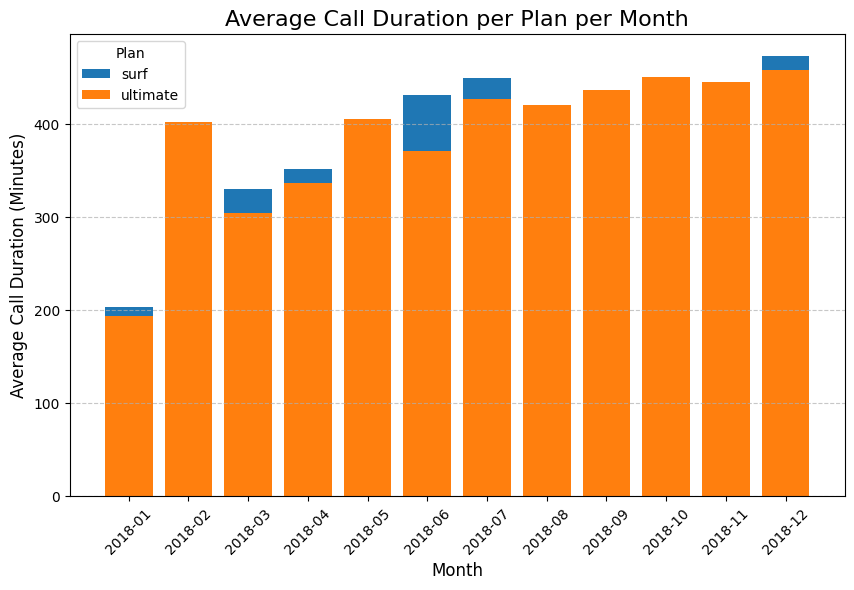

In [48]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
average_call_duration = (
    merged_df.groupby(['plan','year_month'])['total_minutes']
    .mean()
    .reset_index()
)
average_call_duration.rename(
    columns={'total_minutes':'avg_call_duration'}, inplace=True
)

plt.figure(figsize=(10,6))
for plan in average_call_duration['plan'].unique():
    plan_data = average_call_duration[average_call_duration['plan'] == plan]
    plt.bar(
        plan_data['year_month'].astype(str),
        plan_data['avg_call_duration'],
        label=plan
)
plt.title('Average Call Duration per Plan per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Call Duration (Minutes)', fontsize=12)
plt.legend(title='Plan', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout

plt.show()

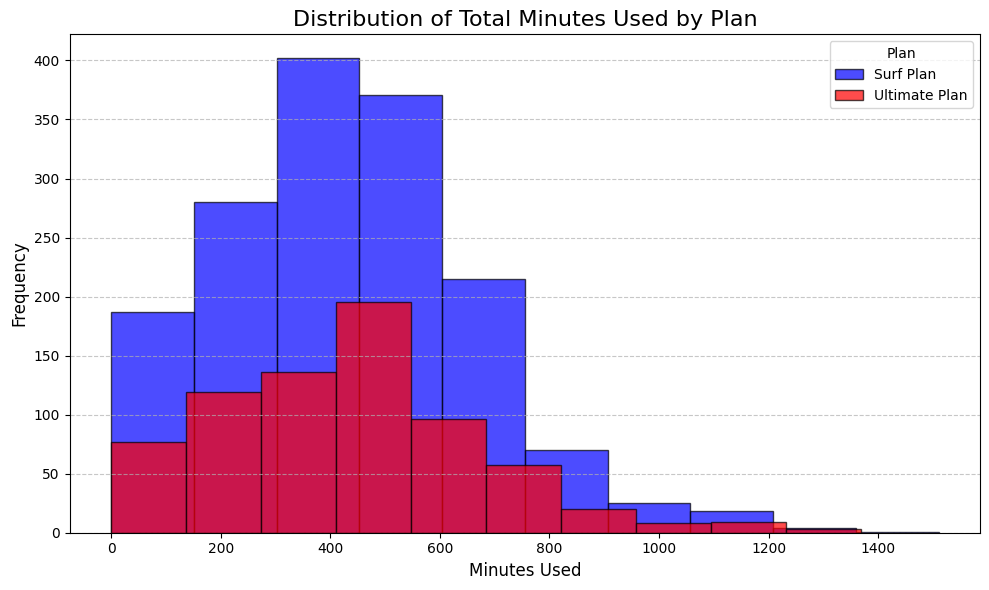

In [49]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_plan_minutes = merged_df[merged_df['plan'] == 'surf']['total_minutes']
ultimate_plan_minutes = merged_df[merged_df['plan'] == 'ultimate']['total_minutes']

plt.figure(figsize=(10,6))
plt.hist(
    surf_plan_minutes, bins=10, alpha=0.7, label='Surf Plan', color='blue', edgecolor='black'
)
plt.hist(
    ultimate_plan_minutes, bins=10, alpha=0.7, label='Ultimate Plan', color='red', edgecolor='black'
)

plt.title('Distribution of Total Minutes Used by Plan', fontsize=16)
plt.xlabel('Minutes Used', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Plan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [50]:
# Calculate the mean and the variance of the monthly call duration
call_duration_stats = (
    merged_df.groupby('plan')['total_minutes']
    .agg(mean_duration='mean', variance_duration='var')
    .reset_index()
)

print('Call Duration Statistics by PLan:')
display(call_duration_stats)

Call Duration Statistics by PLan:


,plan,mean_duration,variance_duration
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


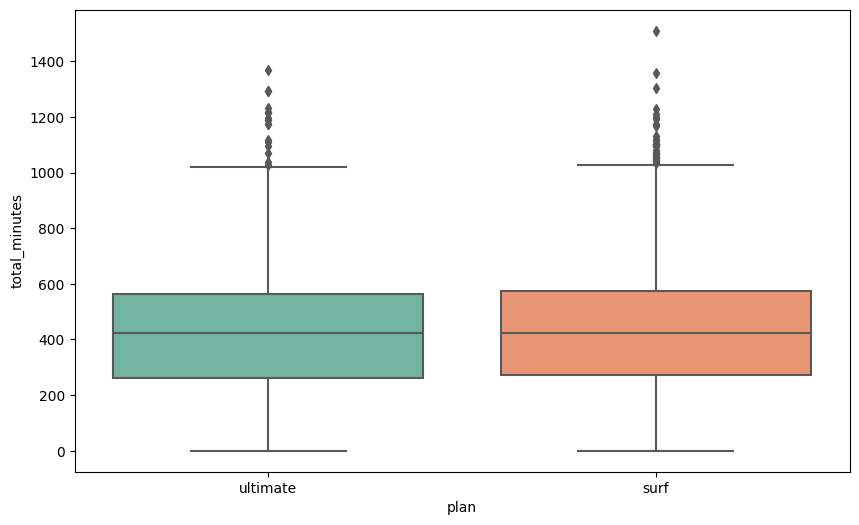

In [51]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='plan', y='total_minutes', palette='Set2')

plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

Based on the results from it is safe to conclude that there is a difference in behavior between the two plans. 1. user who use the surf plan make more longer calls monthly compare to user who use ultimate. 2. Surf use a higher frequency of minutes compared to ultimate especially around the 300 - 600 minutes mark. 3. ulitmate does have more user than surf using the higher end of minutes. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Perfect</div>

### Messages

Descriptive Statistics for Messages by Plan:


,plan,mean,median,variance
0,surf,31.159568,24.0,1126.724522
1,ultimate,37.551389,30.0,1208.756744


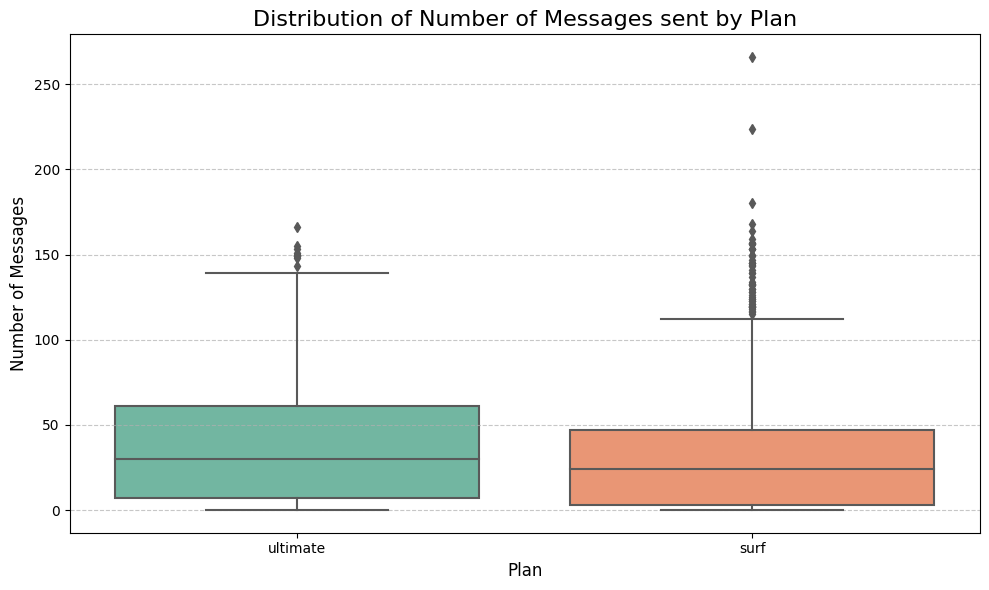

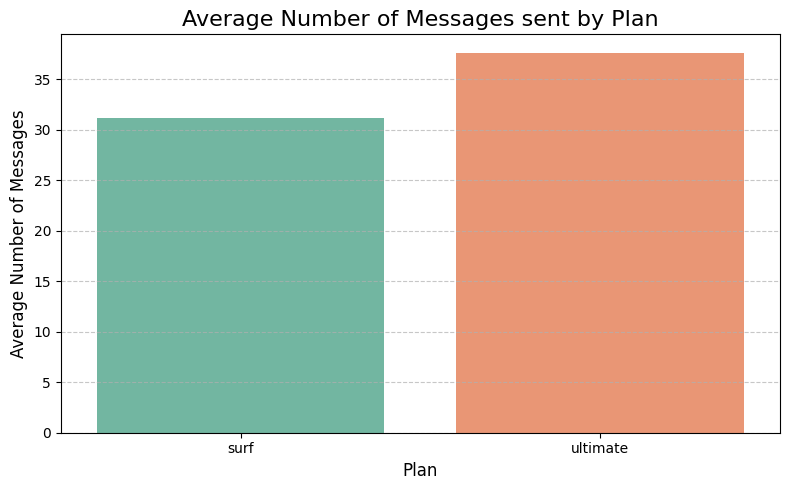

In [52]:
# Compare the number of messages users of each plan tend to send each month
message_stats = merged_df.groupby('plan')['total_messages'].agg(
    mean='mean', median='median', variance='var'
).reset_index()

print("Descriptive Statistics for Messages by Plan:")
display(message_stats)

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='plan', y='total_messages', palette='Set2')

plt.title('Distribution of Number of Messages sent by Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()

plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=message_stats, x='plan', y='mean', palette='Set2')

plt.title('Average Number of Messages sent by Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Average Number of Messages', fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()

plt.show()


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

Based on the results from it is safe to conclude that there is a difference in behavior between the two plans.
1.There are more surf user who send over 150 plus messages than ultimate user.
2.Ultimate user on average send more messages than surf user
3.There are surf user who consumed over 50000 MB than ultimate user.

### Internet

In [53]:
traffic_stats = merged_df.groupby('plan')['monthly_revenue'].agg(
    mean='mean', median='median', variance='var'
).reset_index()

print("Descriptive Statistics for Internet Traffic by Plan:")
display(traffic_stats)


Descriptive Statistics for Internet Traffic by Plan:


,plan,mean,median,variance
0,surf,60.706408,40.36,3067.835152
1,ultimate,72.313889,70.00,129.848486


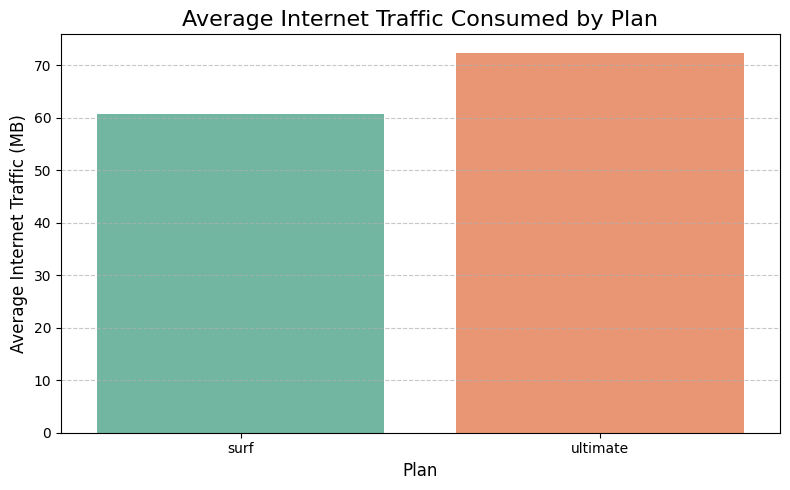

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(data=traffic_stats, x='plan', y='mean', palette='Set2')

plt.title('Average Internet Traffic Consumed by Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Average Internet Traffic (MB)', fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()

plt.show()


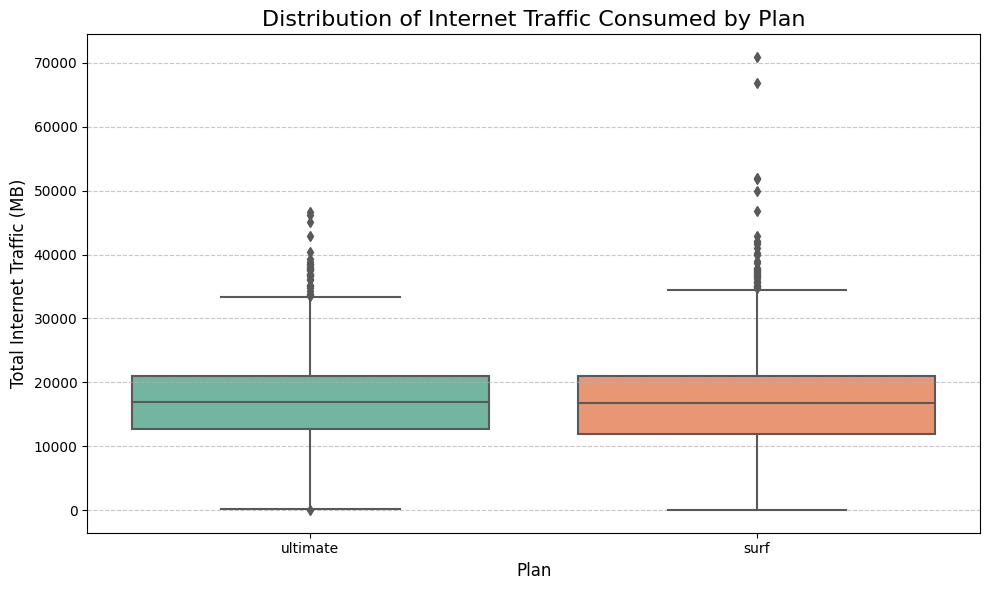

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='plan', y='total_data_usage', palette='Set2')

plt.title('Distribution of Internet Traffic Consumed by Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Total Internet Traffic (MB)', fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

Based on the results from it is safe to conclude that there is a difference in behavior between the two plans.
1.Ultimate user on average use more amount of data compared to surf user. 
2.There are more surf user who consumed over 50000 MB than ultimate user.

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a class="tocSkip"></a> 
 
~~Please move boxplots for traffic from 1.13.2 section to 1.13.3~~</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [56]:
revenue_stats = merged_df.groupby('plan')['monthly_revenue'].agg(
    mean='mean', median='median', variance='var'
).reset_index()

print("Descriptive Statistics for Revenue by Plan:")
display(traffic_stats)


Descriptive Statistics for Revenue by Plan:


,plan,mean,median,variance
0,surf,60.706408,40.36,3067.835152
1,ultimate,72.313889,70.00,129.848486


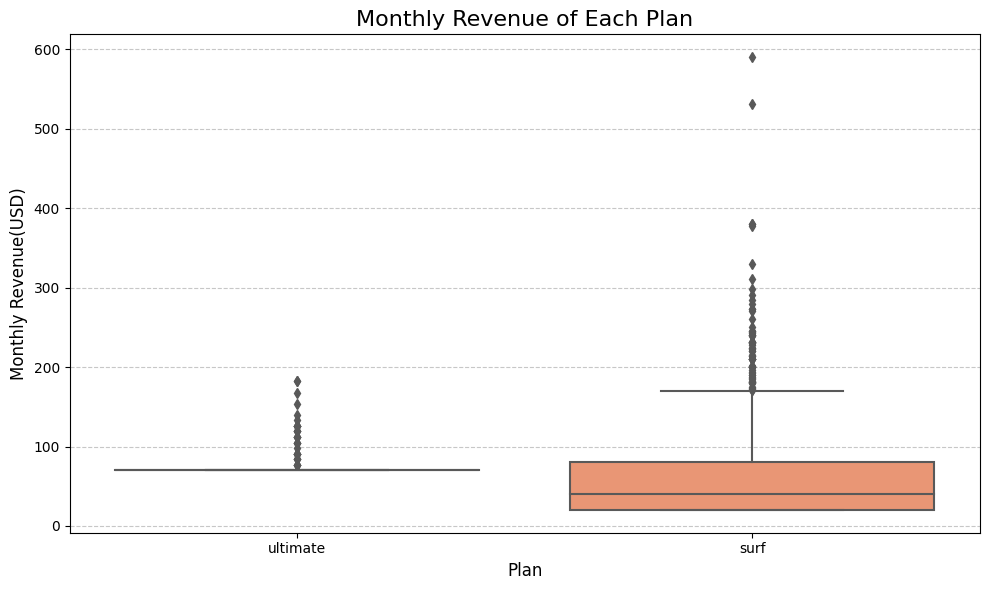

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='plan', y='monthly_revenue', palette='Set2')

plt.title('Monthly Revenue of Each Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Monthly Revenue(USD)', fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()

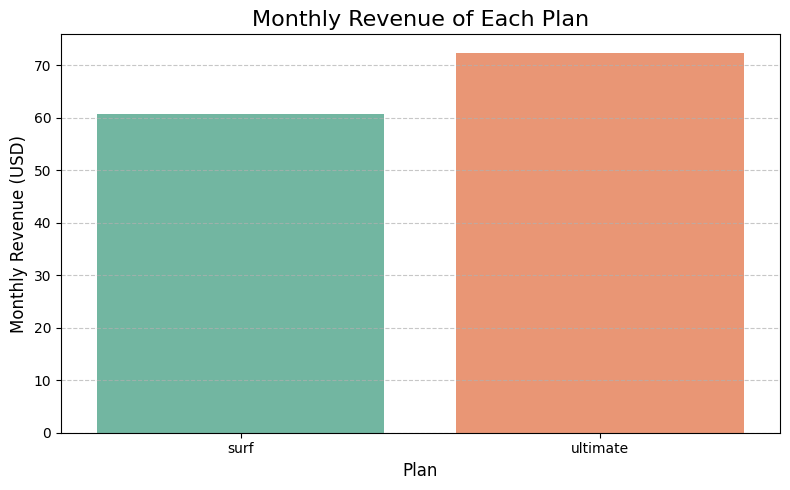

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_stats, x='plan', y='mean', palette='Set2')

plt.title('Monthly Revenue of Each Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Monthly Revenue (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()

plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

Based on the results from it is safe to conclude that there is a difference in behavior between the two plans.
1.surf users have more users that generate of 200 usd per month compared to ultimate users.
2.ultimate user generate more monthly revenue compared to surf users. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Well done</div>

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [59]:
# Test the hypotheses
ultimate_revenue = merged_df[merged_df['plan']== 'ultimate']['monthly_revenue']
surf_revenue = merged_df[merged_df['plan']== 'surf']['monthly_revenue']

t_stat, p_value = ttest_ind(ultimate_revenue, surf_revenue, equal_var=False) #Welch's t-test

alpha = 0.05
display(f"T-statistic: {t_stat}")
display(f"p-value: {p_value}")

if p_value < alpha:
    print("We reject the Null Hypothesis: The average revenue from users of the Ultimate and Surf calling plans differs ")
else:
    print("We fail to reject the Null Hypothesis: No Significant difference in average revenue between the two ")
    

'T-statistic: 7.952094891333888'

'p-value: 3.1703905481135734e-15'

We reject the Null Hypothesis: The average revenue from users of the Ultimate and Surf calling plans differs 


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [60]:
NY_NJ_states = ['NY-NJ-PA','PA-NJ-DE-MD','NY']

In [61]:
merged_df.columns

Index(['user_id', 'year_month', 'total_calls', 'total_minutes',
       'total_messages', 'total_data_usage', 'first_name', 'last_name', 'age',
       'city', 'reg_date', 'plan', 'churn_date', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'monthly_revenue'],
      dtype='object')

In [62]:
# Test the hypotheses
ny_nj_revenue = merged_df[merged_df['city'].str.contains("NY-NJ")]['monthly_revenue']
other_regions_revenue = merged_df[~merged_df['city'].str.contains("NY-NJ")]['monthly_revenue']
                                  
t_stat,p_value = ttest_ind(ny_nj_revenue,other_regions_revenue, equal_var=False) #welch's t-test

alpha = 0.05
display(f"T-statistic: {t_stat}")
display(f"p-value: {p_value}")

if p_value < alpha:
    print("We reject the Null Hypothesis: The average revenue from users in the NY-NJ area is different from that of the users from the other regions ")
else:
    print("We fail to reject the Null Hypothesis: No Significant difference in average revenue between the two ")
    

'T-statistic: -2.1309454999502133'

'p-value: 0.0335256158853001'

We reject the Null Hypothesis: The average revenue from users in the NY-NJ area is different from that of the users from the other regions 


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Perfect code and correct results</div>

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

In conclusions there is a difference in behavior between surf user and ultimate user. Though ultimate user generate more revenue than surf user. surf user have more outliers than ultimate user based of the plan that is provides. I believe moving forward more money needs to spend on surf user because there seems to be a desire from surf user to use more data and spend more money monthly but, the price point for switching plan maybe to high for surf users. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a
class="tocSkip"></a>
Right</div>